# Medical Insurance Claim

Problem Statement:

Build a model to predict whether a person can claim his medical insurance or not. Focus on some factors / parameters that can help. Deploy your model in streamlit or other frameworks. Your app/web application to be user friendly.

# project dependencies

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import joblib

# Data Collection&Analysis

In [4]:
data = pd.read_csv(r"C:\Users\sandeep\Dropbox\internship\I_C_DATA.csv")
data

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


# EXPLORATORY DATA ANALYSIS

In [5]:
data.head()  #PRINTING THE FIRST FIVE ELEMENTS OF THE DATASET

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [6]:
# number of rows and columns
data.shape

(1338, 9)

In [7]:
# getting some informations about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


# DATA CLEANING

Handling missing values, removing duplicates, and correct inconsistent data

In [8]:
# checking for missing values
data.isnull().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

According to the dataset there is no missing values present in the dataset

In [9]:
#statistical measures of the dataset
data.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


# DATA VISUALIZATION

In [10]:
#correlation among the data
data.corr()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,-0.167957,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,-0.039470,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,-0.681149,0.012759,0.003750,0.157566,0.198341,0.384198
steps,-0.167957,-0.039470,-0.681149,1.000000,0.055346,-0.267845,-0.076483,-0.305570,-0.419514
children,0.042469,0.017163,0.012759,0.055346,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,-0.267845,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,-0.076483,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,-0.305570,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.419514,-0.409526,0.333261,0.020891,0.309418,1.000000


C:\Users\sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


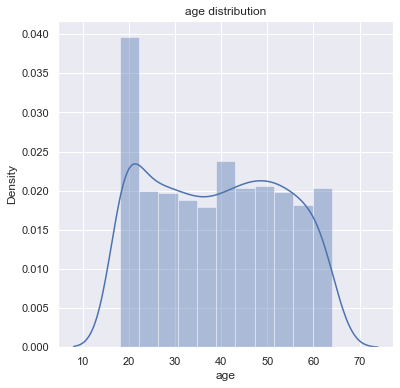

In [11]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])  #here in jupyter distplot is removed in future version instead of distplot we can use "histplot(histogram) if required".
plt.title('age distribution')
plt.show()

In [12]:
#checking the values present in the dataset
data['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

C:\Users\sandeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


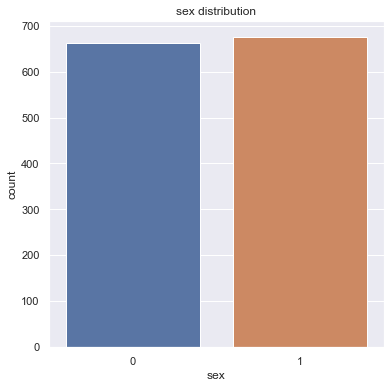

In [13]:
#distribution of sex value
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['sex'])  #here in jupyter distplot is removed in future version instead of distplot we can use "histplot(histogram) if required".
plt.title('sex distribution')
plt.show()

In [14]:
#exact values of sex dist
data['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

C:\Users\sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


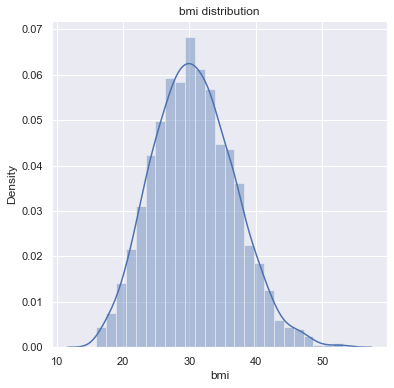

In [15]:
# distribution of bmi values
plt.figure(figsize=(6,6))
sns.distplot(data['bmi']) 
plt.title('bmi distribution')
plt.show()

normal BMI range for a person --->>> 18.5 to 24.9 and its depends on person height and weight

In [16]:
# exact values of bmi of a persons
data['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

C:\Users\sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


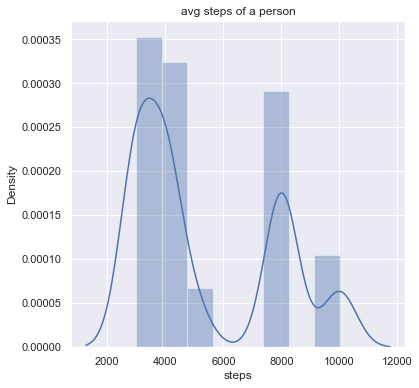

In [17]:
#distribution of steps
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['steps'])
plt.title('avg steps of a person')
plt.show()

In [18]:
#values of steps
data['steps'].value_counts()

8008     52
3008     49
3000     42
4000     42
4005     41
3009     40
4007     39
3006     39
3003     38
3004     38
3002     38
4009     36
3007     35
8009     35
4002     34
8010     34
3001     33
8003     33
3010     33
4003     33
4001     33
4006     33
8000     31
8007     31
4008     31
4004     30
8002     30
3005     29
8005     29
4010     28
8001     26
8004     24
8006     17
10008    16
10004    16
10000    15
10006    14
10007    13
5000     11
10001    11
5010     10
10003    10
5001      9
10005     9
5005      8
10002     7
5004      7
10009     7
5003      6
5006      6
5002      6
5009      6
5008      6
10010     5
5007      4
Name: steps, dtype: int64

C:\Users\sandeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


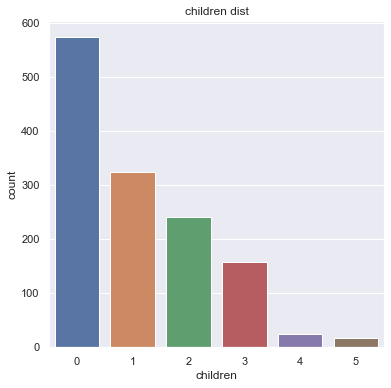

In [19]:
#distribution of childrens value
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['children'])
plt.title('children dist')
plt.show()

In [20]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\sandeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


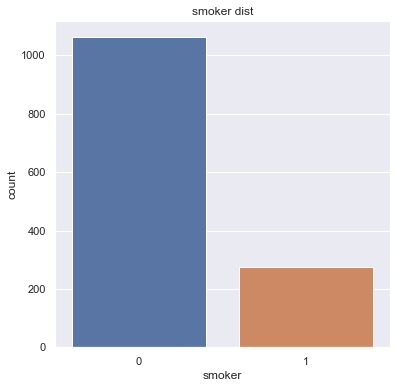

In [21]:
#distribution of smoker value
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['smoker'])  
plt.title('smoker dist')
plt.show()

In [22]:
# values of smokers count
data['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

C:\Users\sandeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


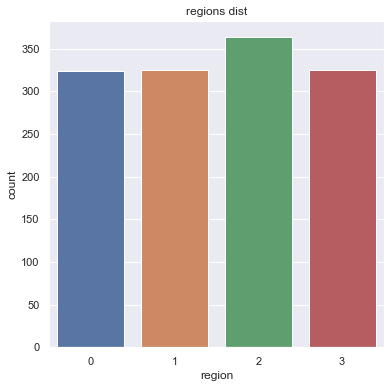

In [23]:
#distribution of region values
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['region'])  
plt.title('regions dist')
plt.show()

In [24]:
#exact values of region values
data['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

C:\Users\sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


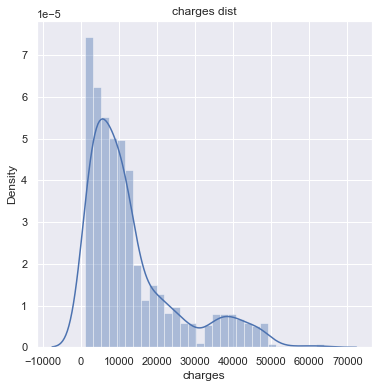

In [25]:
#distribution of charges claim value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])  
plt.title('charges dist')
plt.show()

In [26]:
#exact values of charges
data['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

C:\Users\sandeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


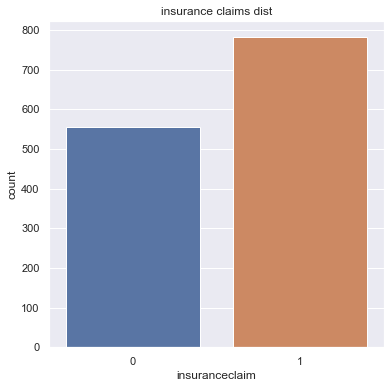

In [27]:
#distribution of insurance claim value
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['insuranceclaim'])  
plt.title('insurance claims dist')
plt.show()

In [28]:
data['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [29]:
#converting categorical data into numerical data

#there is no categorical data so we can proceed with some analysis 

In [30]:
data.columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [31]:
data.corr()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,-0.167957,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,-0.039470,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,-0.681149,0.012759,0.003750,0.157566,0.198341,0.384198
steps,-0.167957,-0.039470,-0.681149,1.000000,0.055346,-0.267845,-0.076483,-0.305570,-0.419514
children,0.042469,0.017163,0.012759,0.055346,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,-0.267845,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,-0.076483,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,-0.305570,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.419514,-0.409526,0.333261,0.020891,0.309418,1.000000


<AxesSubplot:>

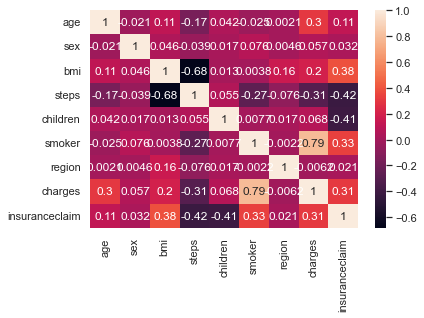

In [32]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

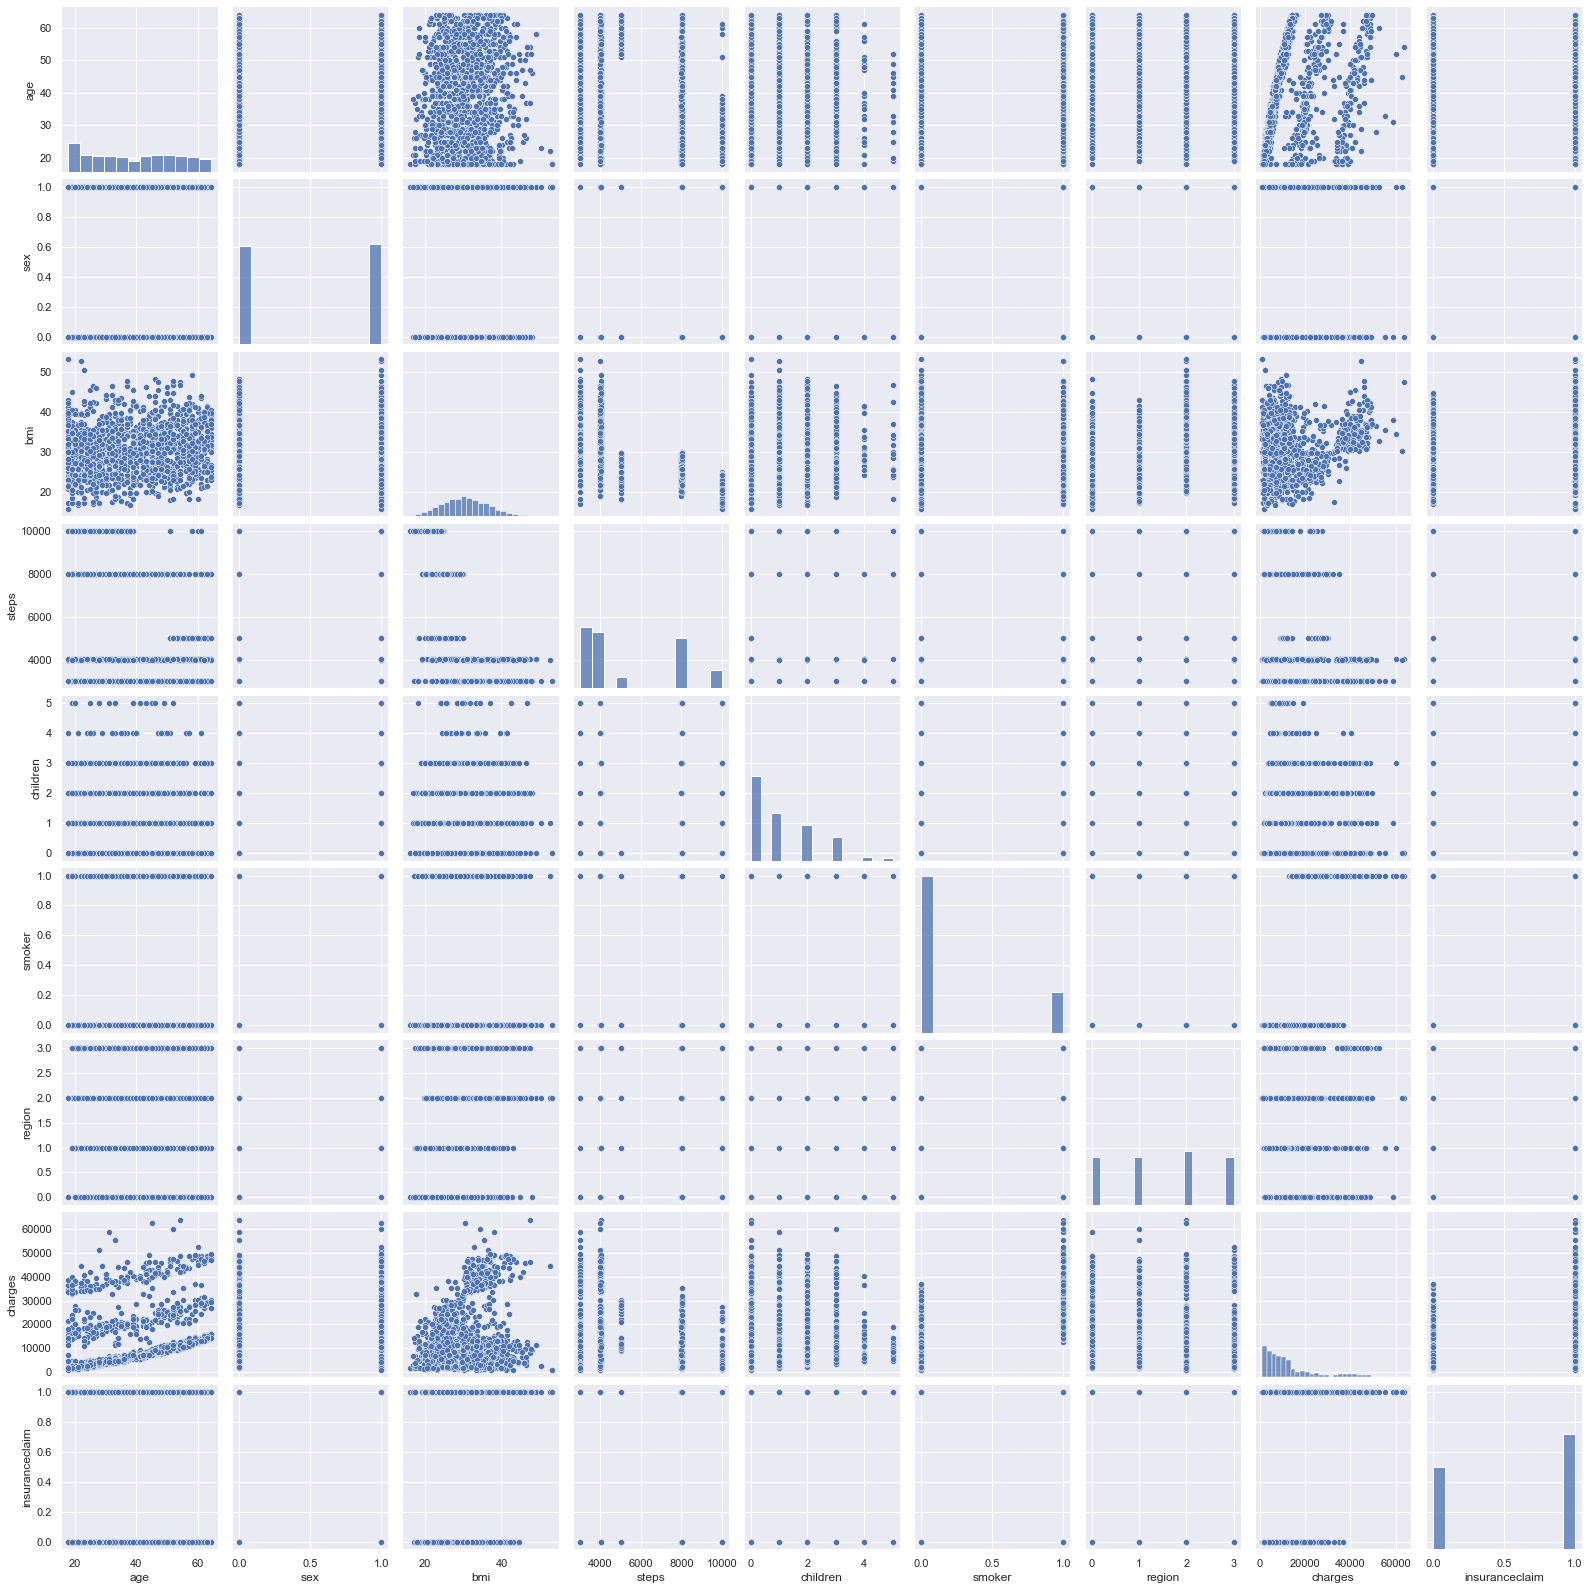

In [33]:
sns.pairplot(data=data)

C:\Users\sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insuranceclaim'>

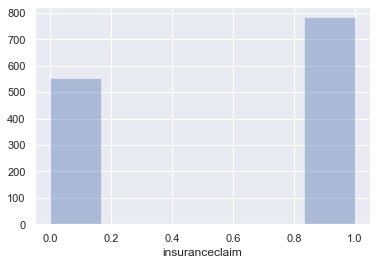

In [34]:
sns.distplot(data['insuranceclaim'],kde=False)

In [35]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [36]:
cf.go_offline()

In [37]:
data.iplot(kind='bar',x='insuranceclaim',y='charges',mode='markers')

C:\Users\sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='insuranceclaim'>

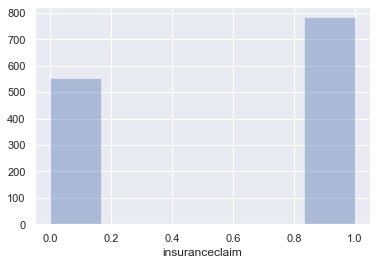

In [38]:
sns.distplot(data['insuranceclaim'],kde=False)

# DATA TRANSFORMATION

(Transform the data into a suitable format for analysis, such as converting categorical data into numerical data.)

In [39]:
data

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


so we need to delete some unusable data from the dataset so as to perform for analysis

# CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA

Step-1 checking the categorical columns present in the dataset

Step-2 Arranging them into sequential order

In [40]:
# Train_test_split
data.columns



Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [41]:
x=data.iloc[:,:8]
y=data.iloc[:,8:9]

# 6. Data Splitting:

Divide the data into training, validation, and testing sets, which are used in different stages of the modeling process.

Testing and Validation

In [60]:
x=data.iloc[:,:8]
y=data.iloc[:,8:9]
y
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

,insuranceclaim
0,1
1,1
2,0
3,0
4,1
...,...
1333,0
1334,1
1335,1
1336,0


Applying various algorithms for the model evaluation

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [63]:
x_test

,age,sex,bmi,steps,children,smoker,region,charges
44,38,1,37.050,4008,1,0,0,6079.67150
134,20,0,28.785,8007,0,0,0,2457.21115
980,54,1,25.460,8009,1,0,0,25517.11363
618,19,0,33.110,4002,0,1,2,34439.85590
1238,37,1,22.705,10008,3,0,0,6985.50695
...,...,...,...,...,...,...,...,...
648,18,1,28.500,8001,0,0,0,1712.22700
1023,18,1,23.320,10010,1,0,2,1711.02680
28,23,1,17.385,10006,1,0,1,2775.19215
798,58,0,33.100,4006,0,0,3,11848.14100


In [64]:
y_test

,insuranceclaim
44,0
134,1
980,0
618,1
1238,0
...,...
648,1
1023,0
28,1
798,1


# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr=LinearRegression()

In [67]:
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
lr.coef_

array([[ 5.13451938e-03,  1.70276164e-02,  2.84899669e-02,
        -1.25755169e-05, -1.69268929e-01,  5.07878636e-01,
        -1.36231499e-02, -3.91286234e-06]])

# Predicting Test Data


Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [69]:
predictions=lr.predict(x_test)
predictions

array([[ 0.7411423 ],
       [ 0.52937738],
       [ 0.36672521],
       [ 1.05331556],
       [-0.09021617],
       [ 0.34888086],
       [ 0.96124825],
       [ 0.13246073],
       [ 0.58757792],
       [ 0.18304224],
       [ 0.54415112],
       [ 0.74386772],
       [ 0.51918456],
       [ 0.67538621],
       [ 0.93620032],
       [ 0.90444981],
       [ 0.20795753],
       [-0.15411142],
       [ 1.04949715],
       [ 0.9196298 ],
       [ 1.07227667],
       [ 0.23141301],
       [ 0.73698805],
       [ 0.22354516],
       [ 0.35153658],
       [ 0.97243721],
       [ 0.62257335],
       [ 1.01250769],
       [ 1.11673034],
       [ 0.39990275],
       [ 0.5098099 ],
       [ 0.33729354],
       [ 0.6452241 ],
       [-0.03907503],
       [ 0.88490601],
       [ 0.378039  ],
       [ 0.34405889],
       [-0.09291459],
       [ 0.60855369],
       [ 0.63928665],
       [ 0.31440741],
       [ 0.45839336],
       [ 0.40259096],
       [ 0.46639369],
       [ 0.59698757],
       [ 0

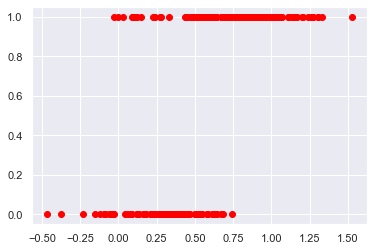

In [70]:
plt.scatter(predictions,y_test,color='red')
plt.show()

# evaluationg the model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**.

In [71]:
#evaluationg the model

from sklearn import metrics
print('mean absolute error is :',metrics.mean_absolute_error(predictions,y_test))

mean absolute error is : 0.31358893244879066


In [72]:
print('mean_Squared_error is :',metrics.mean_squared_error(predictions,y_test))

mean_Squared_error is : 0.14264930456736985


In [73]:
print('root mean squared error is :', np.sqrt(metrics.mean_squared_error(predictions,y_test)))

root mean squared error is : 0.3776894287207015


# loading the model

In [75]:
import pickle


LinearRegression()